## Investigate the synthetic data generated from CART trees

We load the original Adult data as well, such that we can compare to the "ground truth".

In [1]:
import numpy as np
import pandas as pd
import random

import sys
import os
# Tricks for loading data and libraries from parent directories. 
parent = os.path.abspath("..")
grandparent = os.path.abspath("../..")
sys.path.insert(1, parent)
sys.path.insert(2, grandparent)
print(sys.path)

# Custom styles and sizing for matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("tex.mplstyle")
from plotting.plotting_utils import set_size

from sklearn import metrics, preprocessing # plot_roc_curve.

from Data import Data, CustomDataset, ToTensor

# plt.rcParams["figure.dpi"] = 200
# plt.rcParams["figure.figsize"] = (10, 10)


# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 25

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

['/home/ajo/gitRepos/master_thesis/plotting', '/home/ajo/gitRepos/master_thesis', '/home/ajo/gitRepos', '/home/ajo/anaconda3/envs/master/lib/python38.zip', '/home/ajo/anaconda3/envs/master/lib/python3.8', '/home/ajo/anaconda3/envs/master/lib/python3.8/lib-dynload', '', '/home/ajo/.local/lib/python3.8/site-packages', '/home/ajo/anaconda3/envs/master/lib/python3.8/site-packages']


In [9]:
# Set seeds for reproducibility. 
seed = 2300
np.random.seed(seed)
random.seed(seed)

categorical_features = ["workclass","marital_status","occupation","relationship", \
                        "race","sex","native_country"]
numerical_features = ["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]

# Load the real data into the scope. 
training = pd.read_csv("../splitted_data/AD/AD_train.csv", index_col = 0)
test = pd.read_csv("../splitted_data/AD/AD_test.csv", index_col = 0)
valid = pd.read_csv("../splitted_data/AD/AD_valid.csv", index_col = 0)
data = {"Train":training, "Test":test, "Valid":valid}

Data_object = Data(data, cat_features = categorical_features, num_features = numerical_features,
                        seed = seed, already_splitted_data=True, scale_version="quantile", valid = True)
X_train, y_train = Data_object.get_training_data_preprocessed()
print(X_train.shape)

(36177, 88)


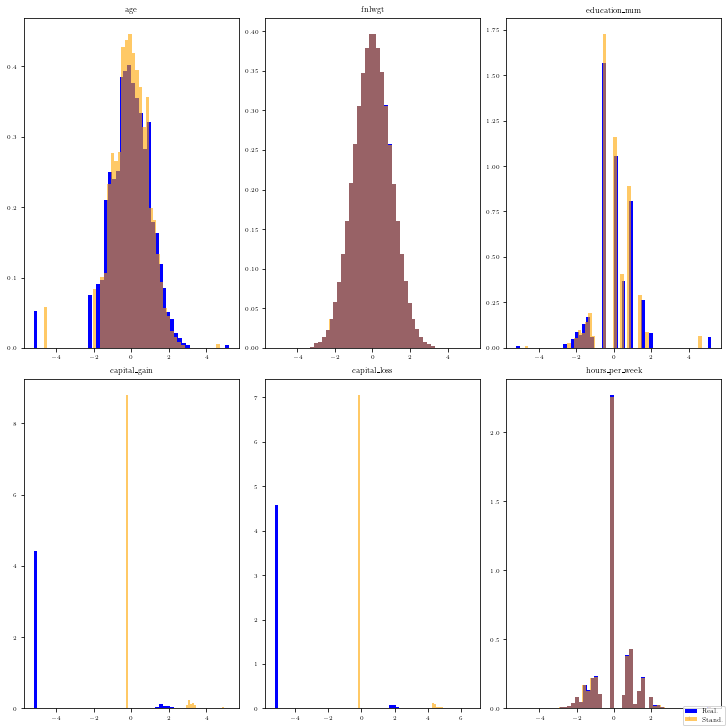

In [10]:
fig, axes = plt.subplots(2,3, figsize = (10,10))
axs = axes.ravel()
features = numerical_features #+ categorical_features
X_train_stand = X_train.copy()
X_back = X_train.copy()
scaler = preprocessing.StandardScaler().fit(X_train[numerical_features])
X_train_stand[numerical_features] = scaler.transform(X_train[numerical_features])
X_back[numerical_features] = scaler.inverse_transform(X_train_stand[numerical_features])
for idx, ax in enumerate(axs):
    if idx > len(features)-1:
        break
    if idx in range(len(numerical_features)):
        ax.hist(X_train[features[idx]], density = True, color = "b", label = "Real.", bins = 50)
        ax.hist(X_train_stand[features[idx]], density = True, color = "orange", label = "Stand.", bins = 50, alpha = 0.6)
        #ax.hist(X_back[features[idx]], density = True, color = "green", label = "Back.", bins = 50, alpha = 1)
        #ax.legend()
        ax.title.set_text(features[idx])
    
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = "lower right")
#axes[4,2].set_axis_off()

In [5]:
categorical_features = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Load the real data into the scope. 
training = pd.read_csv("../splitted_data/CH/CH_train.csv", index_col = 0)
test = pd.read_csv("../splitted_data/CH/CH_test.csv", index_col = 0)
valid = pd.read_csv("../splitted_data/CH/CH_valid.csv", index_col = 0)
data = {"Train":training, "Test":test, "Valid":valid}

Data_object = Data(data, cat_features = categorical_features, num_features = numerical_features,
                        seed = seed, already_splitted_data=True, scale_version="quantile", valid = True)
X_train, y_train = Data_object.get_training_data_preprocessed()

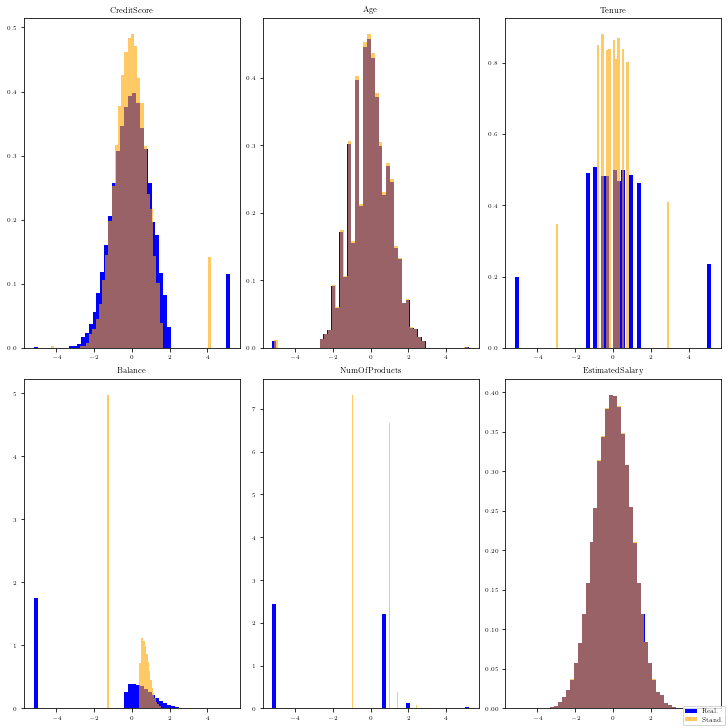

In [6]:
fig, axes = plt.subplots(2,3, figsize = (10,10))
axs = axes.ravel()
features = numerical_features #+ categorical_features
X_train_stand = X_train.copy()
X_train_stand[numerical_features] = preprocessing.StandardScaler().fit_transform(X_train[numerical_features])
for idx, ax in enumerate(axs):
    if idx > len(features)-1:
        break
    if idx in range(len(numerical_features)):
        ax.hist(X_train[features[idx]], density = True, color = "b", label = "Real.", bins = 50)
        ax.hist(X_train_stand[features[idx]], density = True, color = "orange", label = "Stand.", bins = 50, alpha = 0.6)
        #ax.legend()
        ax.title.set_text(features[idx])
    elif idx in range(len(numerical_features),len(numerical_features) + len(categorical_features)):
        (X_train[features[idx]].value_counts(normalize = True)).plot(kind='bar', ax = ax, color = "b", label = "Real.")
        (X_train_stand[features[idx]].value_counts(normalize = True)).plot(kind='bar', ax = ax, color = "o", alpha = 0.6, label = "Stand.")
        ax.title.set_text(features[idx])
        ax.xaxis.set_ticklabels([])
        #ax.legend()
    
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = "lower right")
#axes[4,2].set_axis_off()

In [7]:
categorical_features = []
numerical_features = ["num_pregnant", "plasma", "dbp", "skin", "insulin", "bmi", "pedi", "age"]

# Load the real data into the scope. 
training = pd.read_csv("../splitted_data/DI/DI_train.csv", index_col = 0)
test = pd.read_csv("../splitted_data/DI/DI_test.csv", index_col = 0)
valid = pd.read_csv("../splitted_data/DI/DI_valid.csv", index_col = 0)
data = {"Train":training, "Test":test, "Valid":valid}

Data_object = Data(data, cat_features = categorical_features, num_features = numerical_features,
                   seed = seed, already_splitted_data=True, scale_version="quantile", valid = True)
X_train, y_train = Data_object.get_training_data_preprocessed()

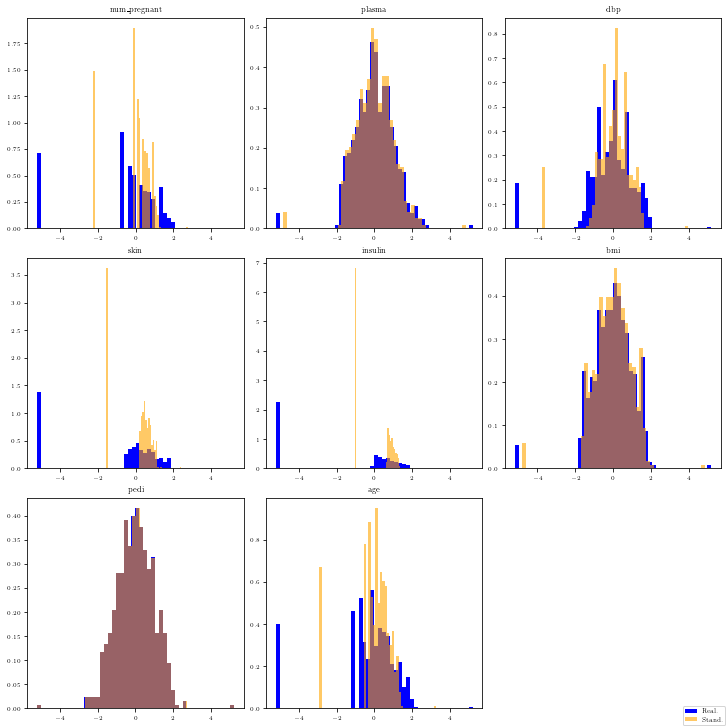

In [8]:
fig, axes = plt.subplots(3,3, figsize = (10,10))
axs = axes.ravel()
features = numerical_features #+ categorical_features
X_train_stand = X_train.copy()
X_train_stand[numerical_features] = preprocessing.StandardScaler().fit_transform(X_train[numerical_features])
for idx, ax in enumerate(axs):
    if idx > len(features)-1:
        break
    if idx in range(len(numerical_features)):
        ax.hist(X_train[features[idx]], density = True, color = "b", label = "Real.", bins = 50)
        ax.hist(X_train_stand[features[idx]], density = True, color = "orange", label = "Stand.", bins = 50, alpha = 0.6)
        #ax.legend()
        ax.title.set_text(features[idx])
    elif idx in range(len(numerical_features),len(numerical_features) + len(categorical_features)):
        (X_train[features[idx]].value_counts(normalize = True)).plot(kind='bar', ax = ax, color = "b", label = "Real.")
        (X_train_stand[features[idx]].value_counts(normalize = True)).plot(kind='bar', ax = ax, color = "o", alpha = 0.6, label = "Stand.")
        ax.title.set_text(features[idx])
        ax.xaxis.set_ticklabels([])
        #ax.legend()
    
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = "lower right")
axes[2,2].set_axis_off()